In [35]:
# Call the required libraries
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [5]:
# Load the faces datasets
data = np.load("input/olivetti_faces.npy")
data.shape

(400, 64, 64)

In [7]:
# Extract data component for target
targets = np.load("input/olivetti_faces_target.npy")
targets.size

400

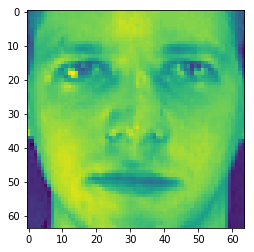

In [11]:
# See an image
firstImage = data[0]
plt.imshow(firstImage)
plt.show()

In [12]:
# Flatten each image
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])     
# Flattened 64 X 64 array # 64 X 64 = 4096
data.shape                               

(400, 4096)

In [13]:
# Patition datasets into two (fancy indexing)
targets < 30                # Output is true/false

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
train = data[targets < 30]  # First 30 types of images out of 40 ie 30 * 10 =300
test = data[targets >= 30]  # Test on rest independent people  10 * 10 = 100

In [15]:
# Test on a subset of people
#     Generate 10 random integers between 0 and 100
n_faces = test.shape[0]//10             # // is unconditionally "flooring division",
n_faces

10

In [16]:
face_ids = np.random.randint(0 , 100, size =n_faces)
face_ids

array([29, 49, 51, 17, 30, 32, 79, 87, 42, 92])

In [17]:
# There are now n_faces random-faces from within 1 to 100
test = test[face_ids, :]   
test

array([[0.13636364, 0.11983471, 0.1322314 , ..., 0.6404959 , 0.6570248 ,
        0.6404959 ],
       [0.29338843, 0.26859504, 0.26859504, ..., 0.5785124 , 0.59090906,
        0.607438  ],
       [0.09917355, 0.11983471, 0.1570248 , ..., 0.7066116 , 0.73966944,
        0.77272725],
       ...,
       [0.3677686 , 0.35950413, 0.38016528, ..., 0.2644628 , 0.2768595 ,
        0.28099173],
       [0.37603307, 0.35950413, 0.29338843, ..., 0.446281  , 0.45454547,
        0.46280992],
       [0.45454547, 0.49586776, 0.54545456, ..., 0.38016528, 0.40082645,
        0.38429752]], dtype=float32)

In [18]:
# Total pixels in any image
n_pixels = data.shape[1]
n_pixels

4096

In [19]:
# Select upper half of the faces as predictors
X_train = train[:, :(n_pixels + 1) // 2]    # // is unconditionally "flooring division",
X_train

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.61157024, 0.59917355,
        0.55785125],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.18181819, 0.18181819,
        0.18181819],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.5785124 , 0.58264464,
        0.58677685],
       ...,
       [0.23553719, 0.35123968, 0.446281  , ..., 0.42561984, 0.4214876 ,
        0.42975205],
       [0.42975205, 0.45041323, 0.49586776, ..., 0.48347107, 0.47107437,
        0.3966942 ],
       [0.40495867, 0.45454547, 0.5       , ..., 0.44214877, 0.5206612 ,
        0.5123967 ]], dtype=float32)

In [20]:
# Lower half of the faces will be target(s)                 
y_train = train[:, n_pixels // 2:]
y_train

array([[0.6446281 , 0.61570245, 0.6446281 , ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.74793386, 0.75619835, 0.7644628 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.19008264, 0.23966943, 0.57438016, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.38842976, 0.40082645, 0.49586776, ..., 0.45454547, 0.45867768,
        0.46280992],
       [0.54545456, 0.5785124 , 0.5206612 , ..., 0.30578512, 0.2892562 ,
        0.3140496 ],
       [0.5206612 , 0.5289256 , 0.5165289 , ..., 0.74380165, 0.73140496,
        0.70247936]], dtype=float32)

In [21]:
# Similarly for test data. Upper and lower half
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

In [22]:
# Fit multi-output estimators

# Prepare a dictionary of estimators after instantiating each one of them
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     # Out of 20000
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "RandomForest": RandomForestRegressor(),
}


In [23]:
# Create an empty dictionary to collect prediction values
y_test_predict = dict()

In [24]:
# Fit each model by turn and make predictions
#     Iterate over dict items
for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    
    y_test_predict[name] = estimator.predict(X_test)

In [25]:
# Verify    
y_test_predict['Ridge'].shape       

(10, 2048)

In [26]:
y_test_predict['RandomForest']. shape

(10, 2048)

In [27]:
## Processing output
# Each face should have this dimension
image_shape = (64, 64)

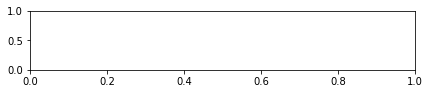

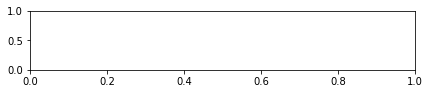

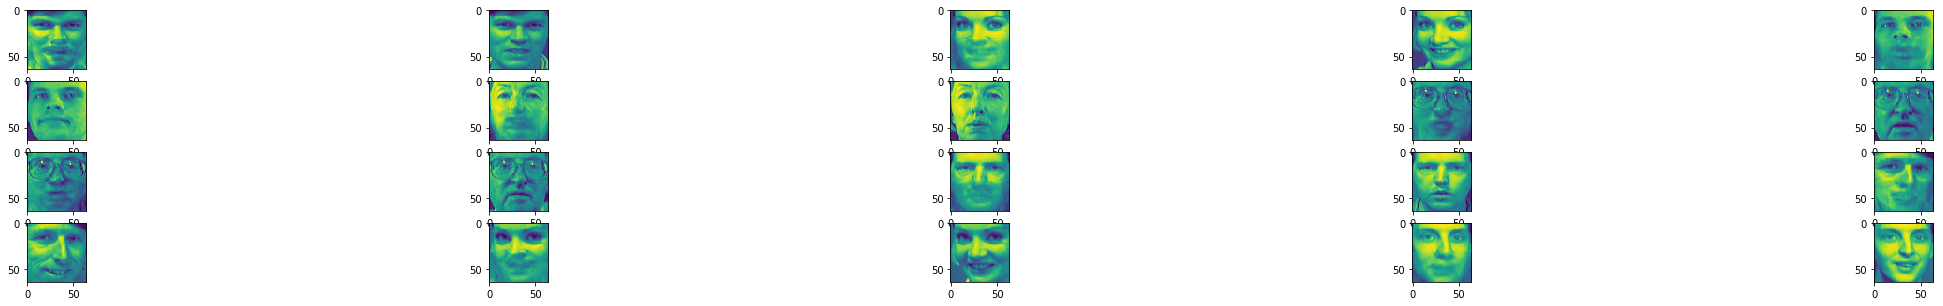

In [30]:
# Plotting
## For 'Ridge' regression

plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(n_faces):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Ridge'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    plt.imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    plt.imshow(y)

plt.show()  


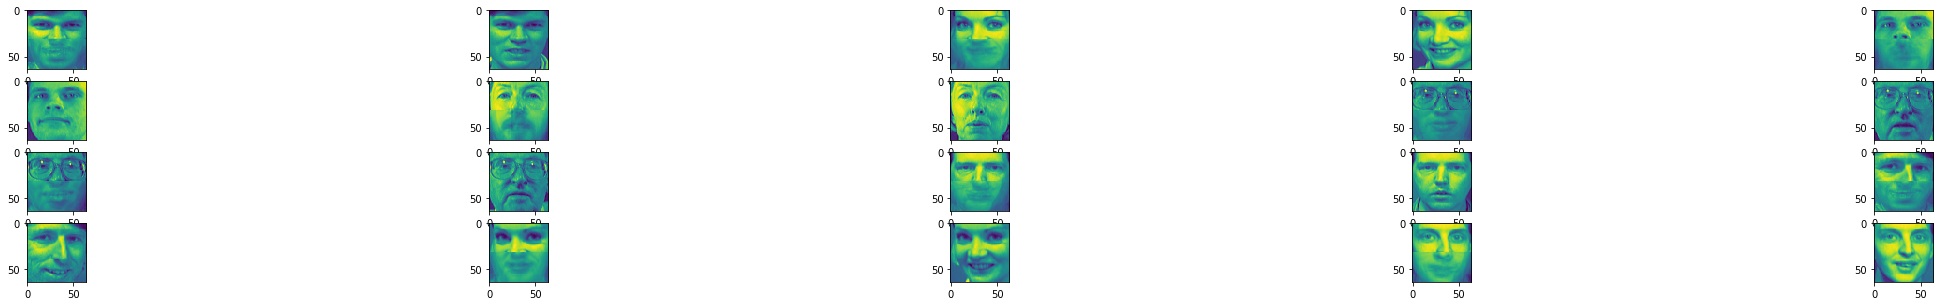

In [31]:
## For 'Extra trees' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(n_faces):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Extra trees'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    plt.imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    plt.imshow(y)

plt.show()

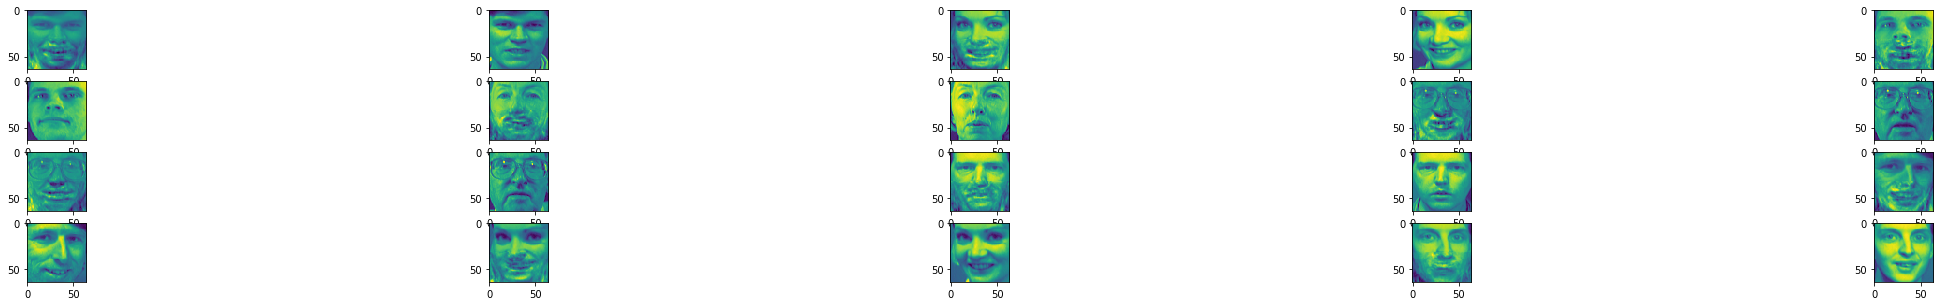

In [32]:
## For 'Linear regression' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(n_faces):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Linear regression'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    plt.imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    plt.imshow(y)

plt.show()

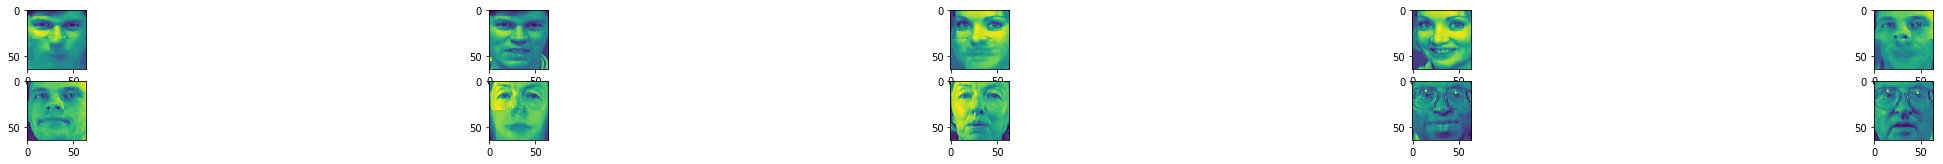

In [33]:
## For '"K-nn' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(5):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['K-nn'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    plt.imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    plt.imshow(y)

plt.show()

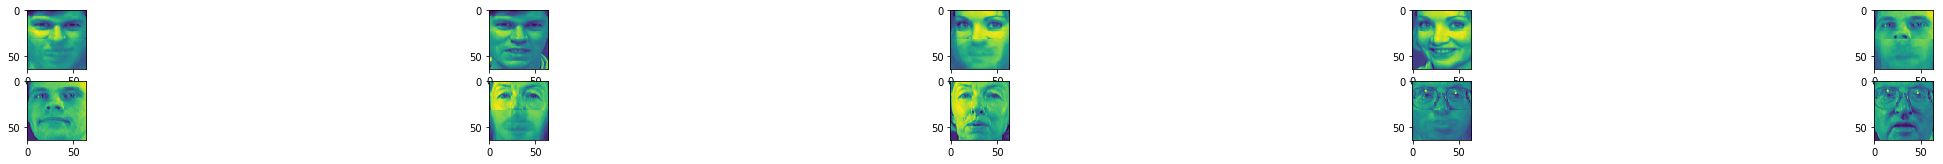

In [34]:
## For '"Random Forest' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(5):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['RandomForest'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    plt.imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    plt.imshow(y)

plt.show()
